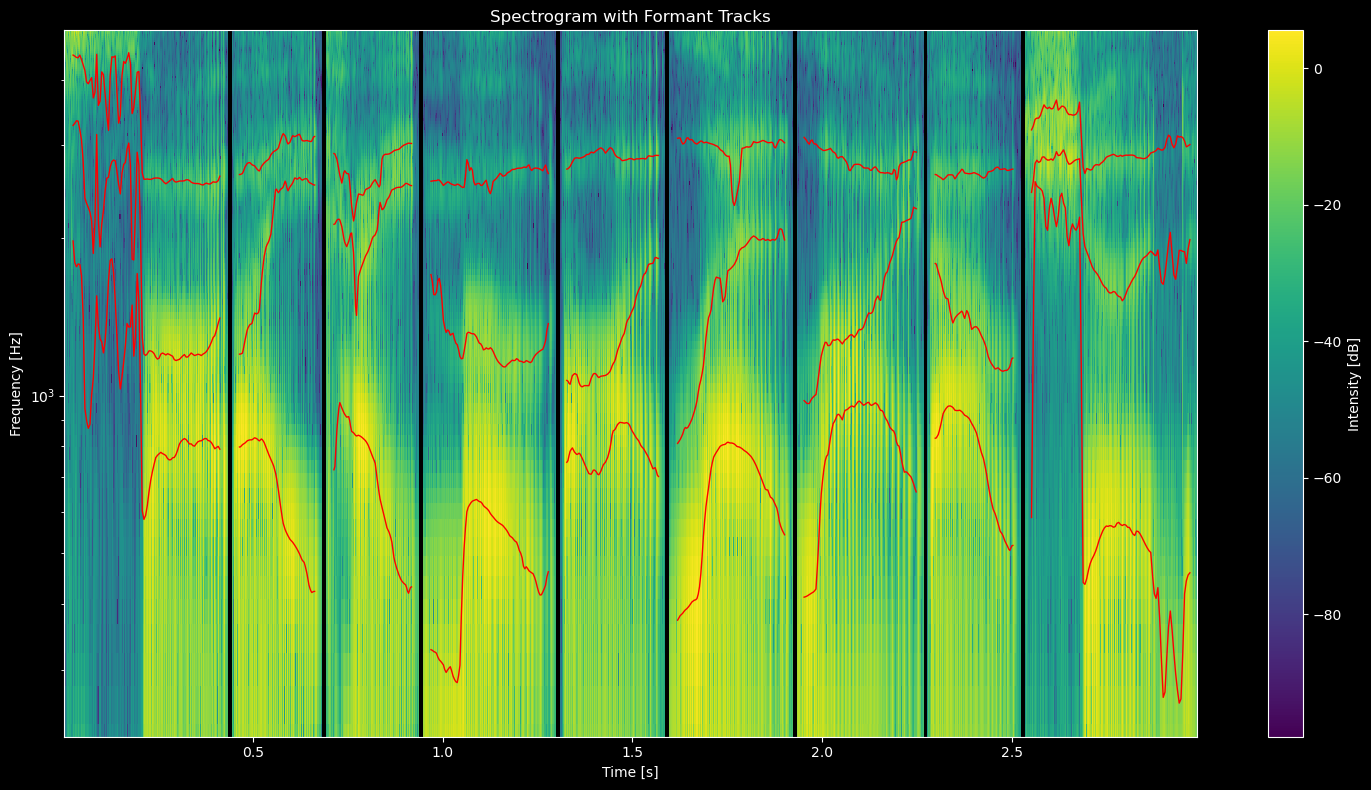

In [1]:
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file using Parselmouth
sound = parselmouth.Sound("../data/test.wav")

# Create TextGrid with silences
grid = call(sound, "To TextGrid (silences)", 100, 0, -25, 0.1, 0.1, "silent", "sounding")

# Extract intervals from TextGrid
intervals = call(grid, "Get number of intervals", 1)
# ... existing imports and sound loading ...

# Create a single figure instead of multiple subplots
plt.figure(figsize=(15, 8))

count = 0
total_duration = 0
for i in range(1, intervals + 1):
    label = call(grid, "Get label of interval", 1, i)
    if label == "sounding":
        # Get interval boundaries
        start = call(grid, "Get start time of interval", 1, i)
        end = call(grid, "Get end time of interval", 1, i)

        # Extract part of the sound
        sound_part = sound.extract_part(from_time=start, to_time=end)

        # Create spectrogram
        spectrogram = sound_part.to_spectrogram()
        X, Y = spectrogram.x_grid(), spectrogram.y_grid()
        sg_db = 10 * np.log10(spectrogram.values)

        # Adjust X coordinates to account for previous intervals
        X = X + total_duration

        # Get formants
        formants = sound_part.to_formant_burg()

        # Plot spectrogram
        plt.pcolormesh(X, Y, sg_db, shading="auto")

        # Plot formant tracks
        for formant_num in range(1, 4):
            formant_values = []
            times = []
            for t in np.linspace(0, sound_part.duration, 100):
                try:
                    formant_value = formants.get_value_at_time(formant_num, t)
                    if formant_value:
                        formant_values.append(formant_value)
                        times.append(t + total_duration)  # Adjust times for overall plot
                except:
                    continue
            if formant_values:
                plt.plot(times, formant_values, "r-", linewidth=1)

        total_duration += sound_part.duration
        count += 1

# Set y-axis to logarithmic scale
plt.yscale("log")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.title("Spectrogram with Formant Tracks")
plt.colorbar(label="Intensity [dB]")

plt.tight_layout()
plt.show()

In [12]:
import os
from os.path import dirname, join, splitext, basename

wordlist = open(f"{dirname(os.getcwd())}/word_lists/dict_word_list.txt", "r").read()

for file in os.listdir(join(dirname(os.getcwd()), "corpus", "unaligned")):
    filename = splitext(basename(file))[0]  # Get name without extension
    if filename.endswith(".wav.txt"):
        os.remove(join(dirname(os.getcwd()), "corpus", "unaligned", filename))


for file in os.listdir(join(dirname(os.getcwd()), "corpus", "unaligned")):
    filename = splitext(basename(file))[0]  # Get name without extension

    with open(join(dirname(os.getcwd()), "corpus", "unaligned", filename + ".txt"), "w") as newFile:
        newFile.write(wordlist)